<h2><span style="text-decoration: underline; color: #000080;">Machine learning:</span></h2>
<ul>
<li><span style="color: #000080;">Logistic regression</span></li>
</ul>

In [ ]:
# imports and setup

import numpy as np
import pandas as pd

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("final_data_after_handling.csv")
df

,Unnamed: 0,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,...,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes,Start_Season,End_Season,Top_3
0,0,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1,17.0,...,0.0,0.0,0.0,0.28,0.28,0,0.00,2005,2006,0
1,1,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2,26.0,...,0.0,1.0,0.0,0.23,0.00,3,17.67,2006,2007,1
2,2,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3,27.0,...,1.0,2.0,0.0,0.74,0.25,2,19.54,2007,2008,1
3,3,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1,31.0,...,0.0,1.0,0.0,0.87,0.49,1,32.85,2008,2009,1
4,4,Lionel Messi,2009-2010,22,FW,Barcelona,es ESP,1. La Liga,1,35.0,...,0.0,0.0,0.0,0.73,0.00,1,22.65,2009,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1299,Asamoah Gyan,2005-2006,19,FW,Modena,it ITA,2. Serie B,5,25.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2005,2006,0
1300,1300,Asamoah Gyan,2006-2007,20,FW,Udinese,it ITA,1. Serie A,10,25.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2006,2007,0
1301,1301,Asamoah Gyan,2008-2009,22,FW,Rennes,fr FRA,1. Ligue 1,7,16.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2008,2009,0
1302,1302,Asamoah Gyan,2009-2010,23,FW,Rennes,fr FRA,1. Ligue 1,9,29.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2009,2010,0


In [13]:
le = LabelEncoder()
x_copy = df.copy()
x_copy['Squad'] = le.fit_transform(x_copy['Squad'])   
x_copy['Player'] = le.fit_transform(x_copy['Player'])
x_copy['Comp'] = le.fit_transform(x_copy['Comp']) 
x_copy['Position'] = le.fit_transform(x_copy['Position'])
x_copy['Total_Goals'] = x_copy['Goals'] + x_copy['Goals_Cups']
x_copy['Winner'] = 0
for i in range(0,1304):
    if x_copy["Ballon_D'or_Rank"][i] == 1:
        x_copy['Winner'][i] = 1
#x_copy['Comp_Cups'] = le.fit_transform(x_copy['Comp_Cups'])
#x_copy['Country'] = le.fit_transform(x_copy['Country'])
x_copy = x_copy.drop(["Player",'Top_3','Season','Unnamed: 0','Country','Comp_Cups',"Start_Season","Ballon_D'or_Percentage_Of_Votes",'End_Season',"Ballon_D'or_Rank"], axis = 1)
x_copy

,Age,Position,Squad,Comp,Lg_Rank,Matches,Starts,Minutes,Goals,Assists,...,Goals_Cups,Assists_Cups,penalty_kicks_made_Cups,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Total_Goals,Winner
0,18,1,9,6,1,17.0,11,911.0,6.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.28,0.28,7.0,0
1,19,1,9,6,2,26.0,23,1983.0,14.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.23,0.00,15.0,0
2,20,1,9,6,3,27.0,23,1973.0,10.0,12.0,...,6.0,2.0,1.0,1.0,2.0,0.0,0.74,0.25,16.0,0
3,21,1,9,6,1,31.0,27,2516.0,23.0,11.0,...,9.0,5.0,0.0,0.0,1.0,0.0,0.87,0.49,32.0,1
4,22,1,9,6,1,35.0,30,2805.0,34.0,9.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.73,0.00,42.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,19,1,70,26,5,25.0,11,1275.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,8.0,0
1300,20,1,114,15,10,25.0,18,1556.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,8.0,0
1301,22,1,94,8,7,16.0,6,619.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0
1302,23,1,94,8,9,29.0,27,2079.0,13.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,13.0,0


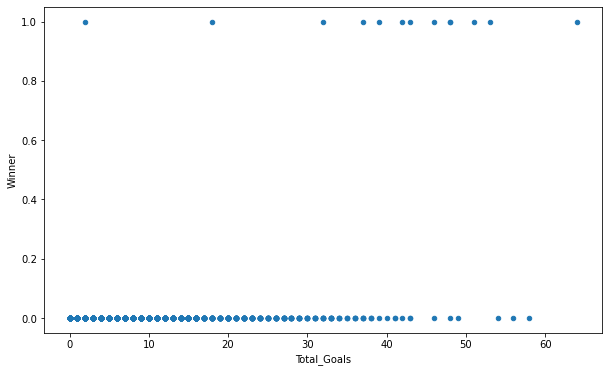

In [14]:
x_copy.plot.scatter(x='Total_Goals',y='Winner',s=20);

In [15]:
for i in range(0,1304):
    if x_copy['Winner'][i] == 1:
        print(x_copy['Total_Goals'][i])
        print(df['Player'][i])
        if  df['Player'][i] == 'Luka Modrić':
            x_copy['Winner'][i] = 0
    

32.0
Lionel Messi
42.0
Lionel Messi
43.0
Lionel Messi
64.0
Lionel Messi
53.0
Lionel Messi
48.0
Lionel Messi
39.0
Cristiano Ronaldo
46.0
Cristiano Ronaldo
48.0
Cristiano Ronaldo
51.0
Cristiano Ronaldo
37.0
Cristiano Ronaldo
2.0
Luka Modrić
18.0
Kaká


In [16]:
lrm=linear_model.LogisticRegression()
lrm.fit(x_copy[["Total_Goals"]],x_copy["Winner"])


LogisticRegression()

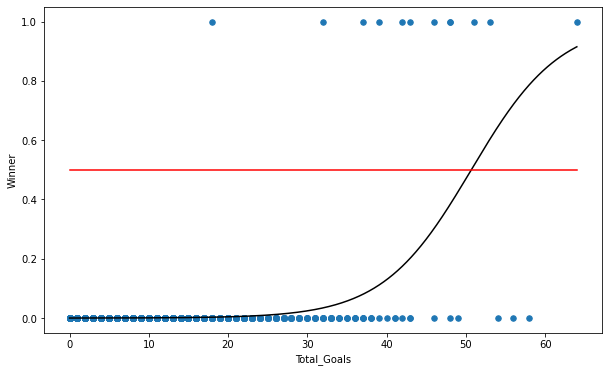

In [17]:
x_copy.plot.scatter(x='Total_Goals',y='Winner',s=30)

#create a set of points along the x axis to print prediction graph
x = np.linspace(x_copy['Total_Goals'].min(),x_copy['Total_Goals'].max(),1000)

#get probabilistic predictions for those points (using predict_proba)
y_pred_p=lrm.predict_proba(np.reshape(x, (-1, 1))) # we need to reshape x to get it to a 2 dimensional array

#get only the probability for the "pass" category
y_pred_p1=[y[1] for y in y_pred_p]

#plot the prediction graph
plt.plot(x,y_pred_p1,color='Black')

# this is an alternative plot option to calculate directly the predicted value, using the model paramters and avoiding predict_proba function
# you can uncomment the line below, and comment the line before and see the results
#plt.plot(x,expit(lrm.intercept_[0]+lrm.coef_[0][0]*x),color='green')

# draw the line of y=0.5 as the decision point
plt.plot(x,[0.5]*len(x),color="red")
plt.show()

In [18]:
total_goals=55
expit(lrm.intercept_[0]+lrm.coef_[0][0]*total_goals)

0.6835474514881167

In [19]:
y_pred = lrm.predict(x_copy[['Total_Goals']])
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
y_actual=x_copy["Winner"]
y_actual

0       0
1       0
2       0
3       1
4       1
       ..
1299    0
1300    0
1301    0
1302    0
1303    0
Name: Winner, Length: 1304, dtype: int64

In [21]:
metrics.confusion_matrix(y_actual, y_pred)

array([[1289,    3],
       [   9,    3]], dtype=int64)

In [22]:
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred))
print("recall is:",metrics.recall_score(y_actual, y_pred))
print("f1 is:",metrics.f1_score(y_actual, y_pred))

accuracy is: 0.99079754601227
precision is: 0.5
recall is: 0.25
f1 is: 0.3333333333333333
